In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define file paths
assistances_file = 'data/Brazil_Joined_Assistances_Summary_2014-2024.txt'

# Read the file into DataFrame (ajuste o separador se necessário)
assistances_df = pd.read_csv(assistances_file, sep='|', encoding='utf-8')

print("Assistances DataFrame:")
print(assistances_df.head())

# Use Portuguese stopwords
en_stopwords = stopwords.words('english')

# Acrescentar stopwords relacionadas aos estados brasileiros (exceto "amazonas")
brazilian_states_stopwords = [
    "alagoas", "amapa", "bahia", "ceara", "distrito", "federal", "espirito", "goias",
    "maranhao", "mato", "grosso", "minas", "gerais", "paraiba", "parana",
    "pernambuco", "piaui", "rio", "grande", "norte", "santa", "santa", "catarina",
    "sao", "paulo", "sergipe", "tocantins", "sul", "do", "de", "janeiro", "distrito", "federal"
]
en_stopwords.extend(brazilian_states_stopwords)

# Use only transaction_description and fill any NA values with empty string
assistances_df['combined_description'] = assistances_df['transaction_description'].fillna('')

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=en_stopwords, max_df=0.95, min_df=2)
tfidf = vectorizer.fit_transform(assistances_df['combined_description'])

from sklearn.decomposition import NMF
n_topics = 144
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(tfidf)
H = nmf_model.components_

n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

# Exibe os top 10 termos para cada tópico (apenas exibição)
for topic_idx, topic in enumerate(H):
    print('Topic %d:' % (topic_idx + 1))
    top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    print(' '.join(top_words))
    print()

# Cria dicionário para mapear cada tópico às suas palavras-chave
topic_keywords = {}
for i in range(n_topics):
    top_words = [feature_names[j] for j in H[i].argsort()[:-n_top_words - 1:-1]]
    topic_keywords[i] = ' '.join(top_words)

# Definição dos grupos e seus tópicos (os números originais começam em 1)
topic_groups = {
    "Confidenciais": [2, 7],
    "Ambientalismo": [8, 29, 35, 50, 53, 56, 60, 67, 68, 71, 74, 75, 79, 81, 93, 113, 129, 135, 141],
    "Mídia": [37, 73, 105, 110, 136],
    "Saúde": [1, 6, 9, 15, 17, 18, 19, 24, 30, 32, 36, 39, 40, 41, 45, 46, 47, 57, 58, 62, 63, 64, 65, 85, 94, 99, 103, 106, 107, 126, 128, 134, 140, 144],
    "Ciência": [16, 22, 42, 51, 52, 70, 95, 102, 108, 114, 119, 124, 133, 137, 138, 139],
    "Tecnologia": [10, 23, 55, 86, 97, 104, 109, 116, 122, 130],
    "Finanças e Administrativo": [3, 4, 5, 11, 12, 14, 21, 25, 26, 31, 33, 38, 44, 48, 61, 77, 80, 83, 88, 91, 92, 96, 98, 112, 118, 127],
    "Social e Humanitário": [20, 66, 78, 87, 89, 101, 115, 123, 125, 131, 142],
    "Governança e Políticas": [13, 34, 76, 90],
    "Educação": [27, 28, 43, 49, 54, 59, 69, 72, 82, 84, 100, 111, 117, 120, 121, 132, 143]
}

# Cria um mapeamento dos tópicos para seus grupos (convertendo para zero-index: 0 a 143)
topic_mapping = {}
for group, topics in topic_groups.items():
    for t in topics:
        topic_mapping[t - 1] = group  # ajuste para zero-indexado

# Identifica o tópico principal para cada assistência (índice do maior valor em W)
primary_topics = W.argmax(axis=1)

# Adiciona as três novas colunas ao DataFrame assistances_df
assistances_df['topic_id'] = primary_topics
assistances_df['topic_keywords'] = [topic_keywords[pt] for pt in primary_topics]
assistances_df['topic_group'] = [topic_mapping.get(pt, 'Outros / Não agrupados') for pt in primary_topics]

# Exibe as primeiras linhas com as novas colunas
internal = tf._api.v2.compat.v2.__internal__
if not hasattr(internal, 'register_load_context_function'):
    internal.register_load_context_function = lambda func: Noneprint(assistances_df[['topic_id', 'topic_keywords', 'topic_group']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leonardodias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Assistances DataFrame:
                award_unique_key    award_id_fain  federal_action_obligation  \
0     ASST_NON_NU2GGH001152_7523     NU2GGH001152                        0.0   
1   ASST_NON_SBR81021GR3005_1900   SBR81021GR3005                        0.0   
2   ASST_NON_SBR25022GR0040_1900   SBR25022GR0040                   103040.0   
3   ASST_NON_SPRMCO22CA0294_1900   SPRMCO22CA0294                  3075606.0   
4  ASST_NON_22IC11132762171_12C2  22IC11132762171                    99733.0   

   total_obligated_amount                            transaction_description  \
0              5985401.07  GH13-1343: STRENGTHEN BRAZIL'S NATIONAL RESPON...   
1                34500.00  PAS RECIFE REQUESTS A NO-COST EXTENSION FOR TH...   
2               103040.00  AMPLIFY THE ENGLISH LANGUAGE LEARNING AND TEAC...   
3              3075606.00  :  VULNERABLE VENEZUELANS LIVING ON THE STREET...   
4               518613.00        BRAZIL CONCESSIONS AND SCIENCE PARTNERSHIPS   

            pri

NameError: name 'tf' is not defined

In [1]:
import tensorflow as tf
from tensorflow import keras

if not hasattr(tf, '__version__'):
    tf.__version__ = '2.16.2'

try:
    # Use tensorflow.keras.utils diretamente
    from tensorflow.keras import utils
except ImportError:
    # Fallback para versões antigas
    try:
        from keras.utils import all_utils as utils
    except ImportError:
        from keras import utils

import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer, util
import numpy as np

# =============================================================================
# 1. Leitura dos Dados e Pré-processamento
# =============================================================================

assistances_file = 'data/Brazil_Joined_Assistances_Summary_2014-2024.txt'
assistances_df = pd.read_csv(assistances_file, sep='|', encoding='utf-8')

print("Assistances DataFrame:")
print(assistances_df.head())

# Usa 'transaction_description' e preenche NA com string vazia
assistances_df['combined_description'] = assistances_df['transaction_description'].fillna('')

# Seleciona todas as colunas que terminam com _description
description_cols = [col for col in assistances_df.columns if col.endswith('_description')]

# Função para combinar descrições de diversas colunas (incluindo transaction_description uma única vez)
def combine_descriptions(row):
    base = str(row.get('transaction_description', '')).strip()
    descriptions = [base] if base else []
    for col in description_cols:
        if col == 'transaction_description':
            continue
        text = str(row.get(col, '')).strip()
        if text and text != base and text not in descriptions:
            descriptions.append(text)
    return " ".join(descriptions)

assistances_df['combined_description'] = assistances_df.apply(combine_descriptions, axis=1)
assistances_df['combined_description'] = assistances_df['combined_description'] + " " + assistances_df['recipient_name'].fillna("")
assistances_df['combined_description'] = assistances_df['combined_description'].str.lower()

# =============================================================================
# 2. Definição das Stopwords e Criação do Vectorizer
# =============================================================================

en_stopwords = stopwords.words('english')
brazilian_states_stopwords = [
    "alagoas", "amapa", "bahia", "ceara", "distrito", "federal", "espirito", "goias",
    "maranhao", "mato", "grosso", "minas", "gerais", "paraiba", "parana",
    "pernambuco", "piaui", "rio", "grande", "norte", "santa", "santa", "catarina",
    "sao", "paulo", "sergipe", "tocantins", "sul", "do", "de", "janeiro", "distrito", "federal"
]
en_stopwords.extend(brazilian_states_stopwords)

vectorizer_model = CountVectorizer(stop_words=en_stopwords, max_df=0.95, min_df=2)

# =============================================================================
# 3. Criação do Modelo BERTopic
# =============================================================================

topic_model = BERTopic(vectorizer_model=vectorizer_model, language="english", calculate_probabilities=True)
docs = assistances_df['combined_description'].tolist()
topics, probabilities = topic_model.fit_transform(docs)

topic_info = topic_model.get_topic_info()
print("Informações dos tópicos:")
print(topic_info.head())

# Cria um dicionário com os top termos de cada tópico (exceto outliers -1)
topic_keywords = {}
for topic_id in topic_info['Topic']:
    keywords = topic_model.get_topic(topic_id)
    if keywords:
        top_words = [word for word, score in keywords]
        topic_keywords[topic_id] = ' '.join(top_words)
    else:
        topic_keywords[topic_id] = ""

# =============================================================================
# 4. Definindo Grupos Temáticos via Seed Words
# =============================================================================

group_seeds = {
    "Confidenciais": ["confidential", "secret", "private", "classified", "restricted", "top secret", "sensitive", "masked", "individual", "person", "individual recipient"],
    "Ambientalismo": ["environment", "biodiversity", "conservation", "sustainability", "climate", "amazon", "indigenous", "forest", "greenhouse", "weather", "wildlife", "reforestation", "ecology", "carbon", "deforestation", "pollution", "indígena", "quilombolas", "quilombola", "territorial management", "environmental", "management", "instituto"],
    "Mídia": ["disinformation", "mis-information", "dis-information", "media", "literacy", "journalism", "news", "communication", "broadcast", "report", "journalism", "journalists", "press", "coverage", "digital media", "broadcasting", "television", "radio", "internet", "social media", "jornalismo", "jornalista", "repórter", "notícias", "deserto"],
    "Saúde": ["mediators", "cells", "gene", "gene expression", "lipid", "health care", "hivaids", "mental illness", "mental", "suicide", "igra", "lipid cells", "antibodies", "health", "disease", "treatment", "medical", "hospital", "epidemiology", "epidemic", "pandemic", "public health", "virus", "tuberculosis", "malaria", "vaccine", "immunization", "hiv", "aids", "covid", "coronavirus", "influenza", "zika", "ebola", "cholera", "dengue", "chikungunya", "yellow fever", "measles", "polio", "hepatitis", "cancer", "diabetes", "hypertension", "mental health", "nutrition", "obesity", "sanitation", "water", "hygiene", "maternal health", "child health", "reproductive health", "family planning", "sexual health", "adolescent health", "elderly health", "disability", "injury", "trauma", "emergency", "first aid", "pharmacy", "pharmaceutical", "drug", "medication", "antibiotic", "antiviral", "antimalarial", "antiretroviral", "antibody", "antigen", "diagnosis", "screening", "test", "laboratory", "clinic", "doctor", "nurse", "midwife", "paramedic", "surgeon", "anesthesiologist", "pediatrician", "gynecologist", "obstetrician", "psychiatrist", "psychologist", "counselor", "therapist", "social worker", "community health worker", "health educator", "nutritionist", "pharmacist", "vaccinator", "epidemiologist", "public health officer", "health administrator", "health economist", "health policy maker", "health researcher", "health journalist", "health advocate", "health activist", "patient", "caregiver", "family", "community", "society", "population", "public", "government", "nonprofit", "civil society", "ngo"],
    "Ciência": ["science", "research", "experiment", "study", "laboratory", "physics", "chemistry", "biology", "engineering", "math", "ai", "nanotechnology", "space", "aerospace"],
    "Tecnologia": ["clouds", "technology", "innovation", "data", "software", "hardware", "automation", "applications", "surfaces", "energy", "gas", "petrobras", "artificial intelligence", "ai", "quantum", "cybersecurity", "blockchain", "robotics", "quantum computing"],
    "Finanças e Administrativo": ["unused funds", "funds", "grant", "grants", "deobligation", "deobligations", "finance", "budget", "account", "administration", "government", "fund", "funding", "tax", "investment", "monetary policy", "economic aid"],
    "Social e Humanitário": ["caritas brasileira", "social", "humanitarian", "community", "welfare", "inclusion", "support", "poverty", "inequality", "displacement", "housing", "ngos"],
    "Governança e Políticas": ["governance", "policy", "politics", "regulation", "law", "public", "elections", "democracy", "corruption", "public service", "human rights"],
    "Educação e Cultura": ["musicians", "musician", "culture", "cultural", "musical", "artistic", "artistica", "artística", "language", "english", "educacao", "education", "teaching", "learning", "school", "university", "academic", "scholarship", "exchange program", "distance learning", "universidade", "faculdade", "faculdades", "analysis", "plasma", "bubbles", "universidade federal", "universidade estadual"],
    "Agropecuária": ["agriculture", "farming", "livestock", "crop", "rural", "agribusiness", "irrigation", "genetic modification", "crop protection", "food security"],
    "Desastres e Emergências": ["disaster", "flood", "hurricane", "emergency response", "recovery", "humanitarian aid"],
    "Defesa e Segurança": ["defense", "security", "military", "air force", "navy", "intelligence", "counterterrorism"],
    "Direitos Humanos e Migração": ["human rights", "migration", "refugee", "asylum", "resettlement", "migration"],
    "Pensão e Previdência": ["pension", "retirement", "social security", "disability benefits"],
    "Woke": ["woke", "racism", "sexism", "discrimination", "inclusion", "diversity", "equity", "justice", "allyship", "intersectionality", "privilege", "microaggression", "bias", "stereotype", "oppression", "women", "youth", "abortion", "lgbtq", "black lives matter", "me me", "climate justice", "social justice", "political correctness", "cancel culture", "msm", "gay", "lgbt", "lgbtqia", "trans", "lesbian", "black"]
}

# Converte todas as seed words para lowercase
for group, seeds in group_seeds.items():
    group_seeds[group] = [seed.lower() for seed in seeds]

# =============================================================================
# 5. Gerando Embeddings para os Grupos
# =============================================================================

# Carrega o modelo do SentenceTransformer (pode-se testar modelos multilíngues se necessário)
embedder = SentenceTransformer("all-MiniLM-L6-v2")
# embedder = SentenceTransformer("distiluse-base-multilingual-cased-v2")

# Calcula o embedding médio de cada grupo baseado nas suas seed words
group_embeddings = {}
for group, seeds in group_seeds.items():
    seed_embeddings = embedder.encode(seeds)
    # Força a conversão para float32
    group_embeddings[group] = np.mean(seed_embeddings, axis=0).astype(np.float32)

# =============================================================================
# 6. Atribuição Automática de Tópicos aos Grupos (Média Ponderada e Threshold)
# =============================================================================

topic_to_group = {}
similarity_threshold = 0.5  # Ajuste esse valor conforme seus testes

for topic_id in topic_keywords.keys():
    topic_terms = topic_model.get_topic(topic_id)
    if topic_terms:
        # Separa os termos e os scores
        words, scores = zip(*topic_terms)
        scores = np.array(scores)
        norm_scores = scores / np.sum(scores)  # Normaliza para soma = 1
        # Calcula os embeddings individuais e a média ponderada
        word_embeddings = np.array([embedder.encode(word) for word in words])
        topic_embedding = np.average(word_embeddings, axis=0, weights=norm_scores).astype(np.float32)
        
        # Calcula similaridade cosseno com cada grupo
        sims = {}
        for group, group_embedding in group_embeddings.items():
            sim = util.cos_sim(topic_embedding.reshape(1, -1), group_embedding.reshape(1, -1))
            sims[group] = sim.item()
        best_group = max(sims, key=sims.get)
        if sims[best_group] < similarity_threshold:
            best_group = "Outros / Não agrupados"
        topic_to_group[topic_id] = best_group
    else:
        topic_to_group[topic_id] = "Outros / Não agrupados"

# =============================================================================
# 7. Atribuindo os Grupos aos Documentos
# =============================================================================

def map_topic_to_group(topic_id):
    return topic_to_group.get(topic_id, "Outros / Não agrupados")

assistances_df['topic_id'] = topics
assistances_df['topic_keywords'] = assistances_df['topic_id'].apply(lambda tid: topic_keywords.get(tid, ""))
assistances_df['topic_group'] = assistances_df['topic_id'].apply(map_topic_to_group)

print(assistances_df[['topic_id', 'topic_keywords', 'topic_group']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leonardodias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/leonardodias/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Assistances DataFrame:
                award_unique_key    award_id_fain  federal_action_obligation  \
0     ASST_NON_NU2GGH001152_7523     NU2GGH001152                        0.0   
1   ASST_NON_SBR81021GR3005_1900   SBR81021GR3005                        0.0   
2   ASST_NON_SBR25022GR0040_1900   SBR25022GR0040                   103040.0   
3   ASST_NON_SPRMCO22CA0294_1900   SPRMCO22CA0294                  3075606.0   
4  ASST_NON_22IC11132762171_12C2  22IC11132762171                    99733.0   

   total_obligated_amount                            transaction_description  \
0              5985401.07  GH13-1343: STRENGTHEN BRAZIL'S NATIONAL RESPON...   
1                34500.00  PAS RECIFE REQUESTS A NO-COST EXTENSION FOR TH...   
2               103040.00  AMPLIFY THE ENGLISH LANGUAGE LEARNING AND TEAC...   
3              3075606.00  :  VULNERABLE VENEZUELANS LIVING ON THE STREET...   
4               518613.00        BRAZIL CONCESSIONS AND SCIENCE PARTNERSHIPS   

            pri

In [8]:
# Agrupa por 'topic_group', conta as ocorrências e ordena de forma decrescente
count_by_group = assistances_df.groupby('topic_group').size().reset_index(name='total')
count_ordered = count_by_group.sort_values(by='total', ascending=False)
count_ordered

,topic_group,total
4,Educação e Cultura,1272
3,Confidenciais,678
10,Social e Humanitário,419
5,Finanças e Administrativo,284
12,Woke,275
9,Saúde,269
1,Ambientalismo,173
11,Tecnologia,95
8,Pensão e Previdência,79
7,Mídia,49


In [10]:


# Converte 'action_date' para datetime e filtra o período
assistances_df['action_date'] = pd.to_datetime(assistances_df['action_date'], errors='coerce')

midia_2019 = assistances_df[
    (assistances_df['topic_group'] == 'Educação e Cultura') &
    (assistances_df['action_date'] >= '2019-01-01')
].copy()

# Seleciona as colunas relevantes e ordena
midia_2019_table = midia_2019[['action_date', 'awarding_agency_name', 'federal_action_obligation', 'total_obligated_amount', 'recipient_name', 'transaction_description', 'topic_keywords', 'topic_id', 'topic_group']]
midia_2019_table = midia_2019_table.sort_values('action_date')


# Permite exibir o texto completo nas colunas
pd.set_option('display.max_colwidth', None)

# Agora, basta exibir o DataFrame novamente
midia_2019_table


,action_date,awarding_agency_name,federal_action_obligation,total_obligated_amount,recipient_name,transaction_description,topic_keywords,topic_id,topic_group
2281,2019-01-03,Department of Health and Human Services,0.00,5985401.07,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,GH13-1343: STRENGTHEN BRAZIL'S NATIONAL RESPONSE TO HIV AND OTHER DISEAS,gh131343 diseas national saude cientifico strengthen em tecnologico response desenvolvimento,2,Educação e Cultura
2287,2019-01-03,Department of Health and Human Services,-212500.00,5985401.07,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,GH13-1343: STRENGTHEN BRAZIL'S NATIONAL RESPONSE TO HIV AND OTHER DISEAS,gh131343 diseas national saude cientifico strengthen em tecnologico response desenvolvimento,2,Educação e Cultura
2290,2019-01-03,Department of Health and Human Services,0.00,5985401.07,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,GH13-1343: STRENGTHEN BRAZIL'S NATIONAL RESPONSE TO HIV AND OTHER DISEAS,gh131343 diseas national saude cientifico strengthen em tecnologico response desenvolvimento,2,Educação e Cultura
2271,2019-01-03,Department of Health and Human Services,0.00,5985401.07,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,GH13-1343: STRENGTHEN BRAZIL'S NATIONAL RESPONSE TO HIV AND OTHER DISEAS,gh131343 diseas national saude cientifico strengthen em tecnologico response desenvolvimento,2,Educação e Cultura
2467,2019-01-16,Department of Defense,75000.00,450000.00,UNIVERSIDADE ESTADUAL DE CAMPINAS,"INCREMENT: TRADITIONAL 12 MONTHS FOREIGN ** FAADC MIGRATION NOTE - ACTION TYPE:""3"" TO ""C"", RECORD TYPE:""2"", BUSINESS FUNDS INDICATOR:""NON"", INDIVIDUAL RECIPIENT INDICATOR:""NO"", RESEARCH AND DEVELOPMENT FUNDS INDICATOR:""YES"", COMPETED OPPORTUNITY:""1"" TO ""C"", NUMBER OF PROPOSALS OR APPLICATIONS:""1"", AWARDING SUB-TIER AGENCY CODE ""5700"" DERIVED FROM AWARDING OFFICE CODE ""FA9550"", FUNDING SUB-TIER AGENCY CODE ""5700"" DERIVED FROM FUNDING OFFICE CODE ""FA9550"", PPOP COUNTRY CODE:""BRA"", PPOP FOREIGN LOCATION DESCRIPTION SET TO PPOP COUNTRY NAME ""BRAZIL"", SMALL BUSINESS INDICATOR:""O"", SAM EXCEPTION:""X"" **",associacao brasil unidos opan indigenous cultural management instituto estados fund,-1,Educação e Cultura
...,...,...,...,...,...,...,...,...,...
1705,2024-11-25,Department of State,4872.00,4872.00,ASSOCIACAO DE AMIGOS JOSE BONIFACIO - AAJOB,"TO ANNOUNCE THE AFCP 2025 AND TO FACILITATE THE GATHERING OF QUILOMBOS (AFRO-BRAZILIAN COMMUNITIES) FROM BOTH THE BRACU? REGION AND THE CAPITAL OF RIO DE JANEIRO, INCLUDING DESCENDANTS OF THOSE AFFECTED BY THE WRECK OF THE SLAVE SHIP CAMARGO.",associacao brasil unidos opan indigenous cultural management instituto estados fund,-1,Educação e Cultura
1986,2024-11-29,Department of Defense,76652.00,76652.00,FUNDACAO DE DESENVOLVIMENTO DA PESQUISA,NON-INTRUSIVE MEASUREMENTS OF THE PHASE CHANGE PROCESS IN ENERGY STORAGE SYSTEMS,associacao brasil unidos opan indigenous cultural management instituto estados fund,-1,Educação e Cultura
1788,2024-12-17,Department of Agriculture,138223.57,460681.57,OPERACAO AMAZONIA NATIVA-OPAN,BRAZIL STRENGTHEN TERRITORIAL MANAGEMENT IN THE AMAZON AND MATO GROSSO,operacao amazon amazonia management natural organizacao cooperacao resources treaty amazonica,69,Educação e Cultura
1937,2024-12-17,Department of State,-12074.69,17925.31,ASSOCIACAO BRASIL - AMERICA PARA EDUCACAO E INTERCAMBIO CULTURAL - ABA,AWARD IS HEREBY BEING AMENDED TO DEOBLIGATE UNUSED FUNDS.,deobligate hereby amended intercambio entre unused educacional os funds comissao,68,Educação e Cultura


In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Educação e Cultura'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
73,Department of Health and Human Services,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,"$5,985,401.07","$478,832,085.60",80
9,Agency for International Development,INSTITUTO INTERNACIONAL DE EDUCACAO DO BRASIL,"$29,157,104.00","$296,868,040.00",41
249,U.S. International Development Finance Corporation,GAVI ALLIANCE,"$250,000,000.00","$250,000,000.00",1
141,Department of State,FAMILY HEALTH INTERNATIONAL,"$150,000,000.00","$150,000,000.00",6
68,Department of Energy,DEPARTMENT OF COMMUNITY SERVICES & DEVELOPMENT CALIFORNIA,"$32,019,936.00","$102,577,407.36",6
5,Agency for International Development,CENTRO INTERNACIONAL DE AGRICULTURA TROPICAL,"$10,623,000.00","$95,607,000.00",9
252,U.S. International Development Finance Corporation,MISCELLANEOUS FOREIGN AWARDEES,"$65,000,000.00","$65,000,000.00",2
74,Department of Health and Human Services,FUNDACAO FACULDADE DE MEDICINA,"$6,381,869.00","$56,301,163.26",28
120,Department of State,BNDES,"$53,472,000.00","$53,472,000.00",3
78,Department of Health and Human Services,THE UNIVERSITY OF MANCHESTER,"$-2,919,895.62","$51,406,306.90",5


In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Confidenciais'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
3,Department of Veterans Affairs,MULTIPLE FOREIGN RECIPIENTS,"$481,964.00","$168,734,694.00",26
8,Social Security Administration,MULTIPLE RECIPIENTS,"$84,077,540.00","$84,077,540.00",0
4,Department of Veterans Affairs,MULTIPLE RECIPIENTS,"$5,286,405.00","$5,286,405.00",0
1,Department of State,INDIVIDUAL RECIPIENT,"$443,865.99","$576,077.54",173
6,Railroad Retirement Board,MULTIPLE FOREIGN RECIPIENTS,"$108,081.26","$108,081.26",88
7,Railroad Retirement Board,MULTIPLE RECIPIENTS,"$76,121.00","$76,121.00",0
2,Department of State,REDACTED DUE TO PII,"$65,300.00","$62,400.00",5
5,National Endowment for the Humanities,MULTIPLE RECIPIENTS,"$60,000.00","$60,000.00",1
0,Department of Agriculture,MULTIPLE RECIPIENTS,$89.00,$89.00,0


In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Social e Humanitário'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
97,Social Security Administration,MULTIPLE RECIPIENTS,"$70,240,861.00","$70,240,861.00",152
60,Department of Transportation,TEXAS DEPARTMENT OF TRANSPORTATION,"$17,912,782.00","$32,802,413.00",7
59,Department of Transportation,INDIANA DEPARTMENT OF TRANSPORTATION,"$825,647.00","$25,352,053.00",11
99,U.S. International Development Finance Corporation,XIC LATINAMERICA INFRASTRUCTURE ALPHA PLUS FUND I,"$25,000,000.00","$25,000,000.00",1
0,Agency for International Development,CARITAS BRASILEIRA,"$7,997,472.00","$21,454,608.00",13
28,Department of State,CARITAS BRASILEIRA,"$7,730,909.00","$13,826,818.00",6
35,Department of State,FONDAZIONE A.V.S.I.,"$11,108,197.00","$12,719,656.64",5
9,Department of Health and Human Services,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,"$742,000.00","$6,853,208.00",17
94,Inter-American Foundation,WORLDWIDE INITIATIVES FOR GRANTMAKING SUPPORT INC.,"$614,565.00","$2,458,260.00",4
96,Social Security Administration,MULTIPLE FOREIGN RECIPIENTS,"$2,050,919.00","$2,050,919.00",6


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Finanças e Administrativo'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
43,Social Security Administration,MULTIPLE FOREIGN RECIPIENTS,"$42,919,201.00","$42,919,201.00",51
10,Department of State,CARITAS SCHWEIZ,"$-87,588.38","$1,403,494.62",1
16,Department of State,CONSELHO CULTURAL THOMAS JEFFERSON,"$-131,562.36","$1,191,916.45",16
0,Agency for International Development,CARITAS BRASILEIRA,"$-8,820.00","$988,652.00",1
19,Department of State,FREELAND FOUNDATION,"$-130,641.51","$619,355.97",1
3,Department of State,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,"$-28,533.79","$207,212.21",4
24,Department of State,GLORIA - ASSOCIACAO EM DEFESA DE MULHERES E MENINAS,"$-11,777.00","$157,323.00",1
41,Department of the Interior,"MASSACHUSETTS AUDUBON SOCIETY, INC.","$106,360.31","$146,360.31",1
42,Railroad Retirement Board,MULTIPLE RECIPIENTS,"$144,476.84","$144,476.84",155
30,Department of State,INSTITUTO PALAVRA ABERTA,"$-6,625.03","$93,004.97",1


In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Woke'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
7,Department of Health and Human Services,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,"$16,888,684.00","$3,881,530,080.00",192
45,U.S. International Development Finance Corporation,MISCELLANEOUS FOREIGN AWARDEES,"$50,000,000.00","$50,000,000.00",1
8,Department of Health and Human Services,FUNDACAO DE APOIO A PESQUISA E A EXTENSAO,"$2,014,969.00","$14,104,783.00",7
9,Department of Health and Human Services,FUNDACAO OSWALDO CRUZ,"$1,473,019.00","$11,784,152.00",8
3,Agency for International Development,SITAWI,"$2,229,809.00","$11,149,045.00",5
4,Department of Agriculture,ALIANCA DA TERRA,"$561,002.00","$2,032,012.00",5
1,Agency for International Development,DANSK FLYGTNINGEHJAELP,$0.00,"$1,201,249.00",1
6,Department of Health and Human Services,CENTRE FOR SEXUAL HEALTH HIV/AIDS RESEARCH ZIMBABWE,"$324,999.00","$1,149,996.00",2
5,Department of Agriculture,IPE - INSTITUTO DE PESQUISAS ECOLOGICAS,"$74,939.00","$518,613.00",1
11,Department of Health and Human Services,UNIVERSITY OF SYDNEY,"$500,626.00","$500,626.00",1


In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Saúde'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
8,Department of Health and Human Services,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,"$9,889,051.00","$1,124,072,735.00",93
12,Department of Health and Human Services,FUNDACAO OSWALDO CRUZ,"$12,597,647.00","$446,104,767.00",40
2,Agency for International Development,UNION INTERNAT TUBERCULOSE MALADIE RESPI,$0.00,"$101,883,719.00",1
9,Department of Health and Human Services,FUNDACAO DE APOIO A PESQUISA E A EXTENSAO,"$3,427,442.58","$78,067,540.66",47
10,Department of Health and Human Services,FUNDACAO DE DESENVOLVIMENTO DA PESQUISA,"$3,529,639.00","$35,374,921.00",31
11,Department of Health and Human Services,FUNDACAO FACULDADE DE MEDICINA,"$221,668.39","$7,909,567.02",18
16,Department of Health and Human Services,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO UFRJ.,"$427,612.00","$7,732,794.00",3
0,Agency for International Development,THE REGISTERED TRUSTEES OF THE IFAKARA HEALTH INSTITUTE,"$803,476.00","$3,213,904.00",4
15,Department of Health and Human Services,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,$0.00,"$2,577,598.00",1
1,Agency for International Development,THE UNIVERSITY OF QUEENSLAND,"$922,411.00","$922,411.00",1


In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Ambientalismo'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
4,Agency for International Development,INSTITUTO INTERNACIONAL DE EDUCACAO DO BRASIL,"$33,591,477.00","$284,272,493.00",50
32,National Science Foundation,INSTITUTO INTERAMERICANO PARA LA INVESTIGACION DEL CAMBIO GLOBAL,"$2,403,000.00","$53,057,472.00",13
5,Agency for International Development,IPE - INSTITUTO DE PESQUISAS ECOLOGICAS,"$3,485,166.00","$34,851,660.00",10
11,Department of Agriculture,INSTITUTO FLORESTA TROPICAL IFT,"$2,257,500.00","$29,347,500.00",13
1,Agency for International Development,CENTRO DE TRABALHO INDIGENISTA,"$4,744,571.00","$21,043,126.00",10
18,Department of Energy,"UNIVERSITY OF CALIFORNIA, MERCED","$3,137,163.00","$9,387,376.92",9
29,Department of the Interior,NATIONAL FISH AND WILDLIFE FOUNDATION,"$7,022,000.00","$7,022,000.00",1
12,Department of Agriculture,INSTITUTO INTERNACIONAL DE EDUCACAO DO BRASIL,"$1,019,854.00","$4,484,025.00",3
6,Department of Agriculture,ALIANCA DA TERRA,"$434,032.00","$2,604,192.00",6
17,Department of Energy,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,"$351,653.00","$2,096,374.00",2


In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Tecnologia'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
26,Department of Health and Human Services,FUNDACION INECO PARA LA INVESTIGACION EN NEUROCIENCIAS COGNITIVAS,"$-816,668.00","$42,494,944.00",16
30,U.S. International Development Finance Corporation,TECHMET PHALABORWA RARE EARTHS,"$30,000,000.00","$30,000,000.00",1
25,Department of Health and Human Services,CENTRO DE PSICOLOGIA MEDICA SAN MARTIN DE TOURS S.R.L.,"$1,336,976.00","$21,247,472.00",8
27,Department of Health and Human Services,UNIVERSIDADE DE SAO PAULO,"$1,618,154.00","$6,472,616.00",4
24,Department of Energy,THE REGENTS OF THE UNIVERSITY OF COLORADO,"$452,000.00","$1,805,986.77",3
4,Department of Agriculture,IPE - INSTITUTO DE PESQUISAS ECOLOGICAS,"$443,674.00","$1,555,839.00",3
6,Department of Defense,FACULDADES CATOLICAS,"$436,662.00","$1,009,986.00",10
22,Department of Defense,UNIVERSIDADE ESTADUAL DE CAMPINAS,"$150,000.00","$900,000.00",2
3,Department of Agriculture,INSTITUTO FLORESTA TROPICAL IFT,"$120,000.00","$664,906.00",1
12,Department of Defense,FUNDACAO DE DESENVOLVIMENTO DA UNICAMP FUNCAMP,"$193,555.59","$393,674.77",7


In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Mídia'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
2,Department of State,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,"$198,208.00","$248,078.57",6
5,Department of State,ASSOCIACAO DA ESCOLA DE JORNALISMO,"$170,295.00","$170,295.00",2
15,Department of State,INSTITUTO PALAVRA ABERTA,"$115,030.00","$108,404.97",2
14,Department of State,GLOBAL TIES U.S.,"$95,306.00","$95,306.00",1
13,Department of State,FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,"$100,000.00","$84,636.57",1
17,Department of State,MISCELLANEOUS FOREIGN AWARDEES,"$67,310.00","$67,299.06",4
12,Department of State,CONSELHO CULTURAL THOMAS JEFFERSON,"$52,835.00","$52,835.00",1
19,Department of State,REDES CORDIAIS - EDUCACAO E MIDIAS,"$45,000.00","$45,000.00",1
9,Department of State,ASSOCIACAO MURAL AGENCIA DE JORNALISMO DAS PERIFERIAS,"$42,500.00","$42,500.00",2
0,Department of State,ASSOCIACAO AMBIENTAL MEDIA,"$34,200.00","$34,200.00",1


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Mídia'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Ciência'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
7,Department of Health and Human Services,FUNDACAO OSWALDO CRUZ,"$7,575,705.00","$276,214,956.00",12
9,National Science Foundation,INSTITUTO INTERAMERICANO PARA LA INVESTIGACION DEL CAMBIO GLOBAL,"$3,215,723.00","$35,973,930.00",13
6,Department of Health and Human Services,ERASMUS UNIVERSITAIR MEDISCH CENTRUM ROTTERDAM (ERASMUS MC),"$1,910,224.00","$18,914,532.00",6
5,Department of Defense,UNIVERSIDADE FEDERAL FLUMINENSE,"$212,294.00","$828,352.00",8
0,Department of Defense,FUNDACAO DE APOIO AO DESENVOLVIMENTO DA UNIVERSIDADE FEDERAL DE PERNAMBUCO,"$278,784.00","$557,568.00",2
1,Department of Defense,FUNDACAO DE DESENVOLVIMENTO DA UNICAMP FUNCAMP,"$199,000.00","$398,000.00",2
2,Department of Defense,FUNDACAO JOSEENSE DE ENSINO E PESQUISA EM ODONTOLOGIA (FUJEPO),"$98,120.00","$98,120.00",1
4,Department of Defense,UNIVERSIDADE DE SAO PAULO,"$30,530.00","$61,060.00",2
3,Department of Defense,FUNDAÇAO DE ESTUDOS E PESQUISAS AQUÁTICAS.,"$44,775.00","$44,775.00",1
8,Department of State,INSTITUTO FRONTEIRAS,"$25,000.00","$25,000.00",1


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Governança e Políticas'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
8,National Science Foundation,INSTITUTO INTERAMERICANO PARA LA INVESTIGACION DEL CAMBIO GLOBAL,"$5,151,163.00","$26,936,358.00",6
7,Department of State,UNITED NATIONS OFFICE ON DRUGS AND CRIME,"$14,067,660.00","$19,237,660.00",11
6,Department of State,THE GLOBAL INITIATIVE AGAINST TRANSNATIONAL ORGANIZED CRIME,"$3,703,637.19","$7,407,274.38",2
2,Department of State,CONVENTION ON INTERNATIONAL TRADE IN ENDANGERED SPECIES OF WILD FAUNA AND FLORA,"$907,327.00","$5,443,962.00",6
3,Department of State,FREELAND FOUNDATION,"$2,749,474.53","$4,913,292.45",2
5,Department of State,MISCELLANEOUS FOREIGN AWARDEES,"$800,000.00","$800,000.00",1
1,Department of State,CADCA,"$400,000.00","$400,000.00",1
4,Department of State,GENERAL SECRETARIAT OF THE ORGANIZATION OF AMERICAN STATES,"$264,184.00","$257,644.06",2
0,Department of Defense,FUNDACAO FACULDADE DE MEDICINA,"$50,000.00","$50,000.00",1


In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filtra apenas as assistências do grupo Saúde
saude_df = assistances_df[assistances_df['topic_group'] == 'Agropecuária'].copy()

# Agrupa por awarding_agency_name e recipient_name, somando federal_action_obligation e total_obligated_amount e contando o total de awards
saude_grouped = saude_df.groupby(['awarding_agency_name', 'recipient_name']).agg({
    'federal_action_obligation': 'sum',
    'total_obligated_amount': 'sum',
    'transaction_description': 'count'
}).rename(columns={'transaction_description': 'total_awards'}).reset_index()

# Ordena decrescente pelo valor numérico de 'total_obligated_amount'
saude_grouped = saude_grouped.sort_values(by='total_obligated_amount', ascending=False)

# Formata as colunas numéricas como valores em dinheiro com duas casas decimais
saude_grouped['federal_action_obligation'] = saude_grouped['federal_action_obligation'].apply(lambda x: f"${x:,.2f}")
saude_grouped['total_obligated_amount'] = saude_grouped['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")

# Exibe o resultado completo sem limitações
saude_grouped


,awarding_agency_name,recipient_name,federal_action_obligation,total_obligated_amount,total_awards
10,Inter-American Foundation,CENTRO DE ESTUDOS E PROMOCAO DA AGRICULTURA DE GRUPO,"$780,436.00","$3,461,744.00",4
13,Inter-American Foundation,DIACONIA,"$507,150.00","$1,014,300.00",2
2,Inter-American Foundation,ASSOCIACAO MOVIMENTO MECENAS DA VIDA,"$478,771.00","$957,542.00",4
15,Inter-American Foundation,MISCELLANEOUS FOREIGN AWARDEES,"$85,000.00","$865,436.00",1
4,Inter-American Foundation,CENTRO DE AGRICULTURA ALTERNATIVA DO NORTE DE MINAS,"$223,050.00","$446,100.00",2
11,Inter-American Foundation,CENTRO DE TECNOLOGIAS ALTERNATIVAS POPULARES,"$286,624.00","$440,624.00",3
1,Inter-American Foundation,ASSOCIACAO ESCOLA FAMILIA AGRICOLA JAGUARIBANA,"$243,543.00","$440,043.00",1
3,Inter-American Foundation,CARITAS BRASILEIRA,"$10,000.00","$352,400.00",1
12,Inter-American Foundation,COMISSAO PASTORAL DA TERRA,"$172,855.00","$345,710.00",2
6,Inter-American Foundation,CENTRO DE DESENVOLVIMENTO AGROECOLOGICO SABIA,"$297,335.00","$297,335.00",1


In [74]:


# Filtra as linhas em que 'transaction_description' contém a string "ABRAJI" (case-insensitive)
abraji_df = assistances_df[
    assistances_df['recipient_name'].str.contains('ABRAJI', case=False, na=False)
].copy()

# Seleciona as colunas solicitadas e ordena por 'action_date'
abraji_table = abraji_df[
    ['recipient_name', 'action_date', 'federal_action_obligation', 
     'total_obligated_amount', 'transaction_description', 'topic_keywords', 'topic_id', 'topic_group']
].sort_values('action_date').reset_index(drop=True)

# Exibe o resultado
abraji_table

,recipient_name,action_date,federal_action_obligation,total_obligated_amount,transaction_description,topic_keywords,topic_id,topic_group
0,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2020-09-08,62968.00,56186.64,FIGHT COVID-19 DISINFORMATION IN BRAZILIAN FAVELAS AND UNDERSERVED COMMUNITIES,opan indigenous management brazilian amazonas antibodies peoples malaria da communities,-1,Ambientalismo
1,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2020-09-28,0.00,56186.64,"CHANGE THE POP TO END THE PROGRAM FROM MARCH 31, 2021 TO MARCH 8, 2021 AND INCLUDE THE CLAUSE ON CHINESE TECHNOLOGY",extend period performance budget due amendment unidos covid19 estados associacao,2,Social e Humanitário
2,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2021-08-02,-6781.36,56186.64,AWARD IS HEREBY BEING AMENDED TO DEOBLIGATE UNUSED FUNDS.,hereby amended deobligate unused funds associacao award unidos cultura closeout,8,Finanças e Administrativo
3,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2021-09-17,68610.00,70623.00,TRAINING AND MENTORSHIP FOR REGIONAL OUTLETS ON FACT-CHECKING SKILLS,unidos cultural estados brasil associacao students english miscellaneous educacional awardees,0,Educação
4,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2021-09-21,28800.00,29115.15,PROMOTE A PODCAST TRAINING FOR 60 JOURNALISTS/COMMUNICATORS FROM THE INTERIOR OF THE BRAZILIAN AMAZON AND THE NORTHEAST REGION OF THE COUNTRY.,unidos cultural estados brasil associacao students english miscellaneous educacional awardees,0,Educação
5,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2022-01-18,1000.00,29115.15,TO INCREASE THE GRANT'S TOTAL AMOUNT TO ADD 4 CELLPHONES AS A PRIZE FOR THE BEST 4 PODCAST PROGRAMS DEVELOPED BY THE PARTICIPANTS DURING THE TRAINING.,extend period performance budget due amendment unidos covid19 estados associacao,2,Social e Humanitário
6,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2022-08-02,3000.00,70623.00,INCLUDE ONE IN-PERSON TRAINING DAY FOR JOURNALISTS PARTICIPATING IN THE PROGRAM,unidos cultural estados brasil associacao students english miscellaneous educacional awardees,0,Educação
7,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2022-09-29,71368.00,51287.42,TO DESIGN AND IMPLEMENT AN INTERNATIONAL TRAINING PROGRAM FOR 50 JOURNALISTS THAT FOCUSES ON UNDERSTANDING INVESTIGATIVE JOURNALISM AS A SPECIALTY THAT CAN ACHIEVE A BETTER PERFORMANCE IF TREATED LIKE A PROCESS.,unidos cultural estados brasil associacao students english miscellaneous educacional awardees,0,Educação
8,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2023-07-24,-684.85,29115.15,AWARD IS HEREBY BEIND AMENDED TO DEOBLIGATE UNUSED FUNDS.,hereby amended deobligate unused funds associacao award unidos cultura closeout,8,Finanças e Administrativo
9,ASSOCIACAO BRASILEIRA DE JORNALISMO INVESTIGATIVO - ABRAJI,2023-09-18,20430.00,20430.00,ONLINE TRAINING PROGRAM FOR JOURNALISTS FROM ALL OVER BRAZIL TO ADDRESS AI-POWERED ELECTORAL DISINFORMATION,unidos cultural estados brasil associacao students english miscellaneous educacional awardees,0,Educação


In [98]:
# Agrupa por 'awarding_agency', conta as ocorrências e ordena de forma decrescente
count_by_agency = assistances_df.groupby('awarding_agency_name').size().reset_index(name='total')
count_by_agency = count_by_agency.sort_values(by='total', ascending=False)

# Exibe o resultado
count_by_agency

,awarding_agency_name,total
6,Department of State,1209
5,Department of Health and Human Services,665
17,Social Security Administration,396
3,Department of Defense,345
16,Railroad Retirement Board,275
8,Department of Veterans Affairs,271
0,Agency for International Development,186
2,Department of Agriculture,97
11,Inter-American Foundation,95
9,Department of the Interior,37


In [99]:
# Set display options to show all rows and full column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filter for Department of State records and group by recipient_name
dept_state_summary = assistances_df[assistances_df['awarding_agency_name'] == 'Department of State'].groupby('recipient_name').agg({
    'recipient_name': 'count',
    'total_obligated_amount': 'sum',
    'subaward_amount': 'sum'
}).rename(columns={'recipient_name': 'count'})

# Format the total_obligated_amount as currency
dept_state_summary['total_obligated_amount'] = dept_state_summary['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")
dept_state_summary['subaward_amount'] = dept_state_summary['subaward_amount'].apply(lambda x: f"${x:,.2f}")

# Sort by total_obligated_amount (converting back to float for sorting)
dept_state_summary = dept_state_summary.sort_values(
    by='total_obligated_amount',
    key=lambda x: x.str.replace('$', '').str.replace(',', '').astype(float),
    ascending=False
)

# Display the results
display(dept_state_summary)

,count,total_obligated_amount,subaward_amount
recipient_name,,,
FAMILY HEALTH INTERNATIONAL,6,"$150,000,000.00","$465,075.09"
BNDES,3,"$53,472,000.00",$0.00
INSTITUTE OF INTERNATIONAL EDUCATION INC,4,"$49,516,996.00","$886,233.00"
ASSOCIAÇAO PARA O INTERCÂMBIO EDUCACIONAL ENTRE OS ESTADOS UNIDOS DA AMÉRICA E O BRASIL.,47,"$44,658,158.34",$0.00
COMISSAO PARA O INTERCAMBIO EDUCACIONAL ENTRE OS ESTADOS UNIDOS E O BRASIL,42,"$42,040,212.25",$0.00
UNITED NATIONS OFFICE ON DRUGS AND CRIME,13,"$34,553,672.00",$0.00
FONDAZIONE A.V.S.I.,12,"$31,782,949.20",$0.00
CARITAS BRASILEIRA,6,"$13,826,818.00",$0.00
"PARTNERS OF THE AMERICAS, INC.",10,"$13,809,080.00","$250,000.00"


In [91]:
# Set display options to show all rows and full column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filter for Department of State records and group by recipient_name
dept_state_summary = assistances_df[assistances_df['awarding_agency_name'] == 'Department of Health and Human Services'].groupby('recipient_name').agg({
    'recipient_name': 'count',
    'total_obligated_amount': 'sum',
    'subaward_amount': 'sum'
}).rename(columns={'recipient_name': 'count'})

# Format the total_obligated_amount as currency
dept_state_summary['total_obligated_amount'] = dept_state_summary['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")
dept_state_summary['subaward_amount'] = dept_state_summary['subaward_amount'].apply(lambda x: f"${x:,.2f}")

# Sort by total_obligated_amount (converting back to float for sorting)
dept_state_summary = dept_state_summary.sort_values(
    by='total_obligated_amount',
    key=lambda x: x.str.replace('$', '').str.replace(',', '').astype(float),
    ascending=False
)

# Display the results
display(dept_state_summary)

,count,total_obligated_amount,subaward_amount
recipient_name,,,
FIOTEC - FUNDACAO PARA O DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO EM SAUDE,382,"$5,491,288,108.60",$0.00
FUNDACAO OSWALDO CRUZ,60,"$734,103,875.00",$0.00
FUNDACAO DE APOIO A PESQUISA E A EXTENSAO,54,"$92,172,323.66",$0.00
FUNDACAO FACULDADE DE MEDICINA,46,"$64,210,730.28",$0.00
FUNDACION INECO PARA LA INVESTIGACION EN NEUROCIENCIAS COGNITIVAS,20,"$53,118,680.00","$3,162,708.00"
THE UNIVERSITY OF MANCHESTER,5,"$51,406,306.90",$0.00
FACULTAD LATINOAMERICANA DE CIENCIAS SOCIALES,9,"$41,436,576.00","$1,503,846.00"
FUNDACAO DE DESENVOLVIMENTO DA PESQUISA,31,"$35,374,921.00",$0.00
CENTRO DE PSICOLOGIA MEDICA SAN MARTIN DE TOURS S.R.L.,10,"$26,559,340.00","$1,581,354.00"


In [92]:
# Set display options to show all rows and full column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filter for Department of State records and group by recipient_name
dept_state_summary = assistances_df[assistances_df['awarding_agency_name'] == 'Department of Defense'].groupby('recipient_name').agg({
    'recipient_name': 'count',
    'total_obligated_amount': 'sum',
    'subaward_amount': 'sum'
}).rename(columns={'recipient_name': 'count'})

# Format the total_obligated_amount as currency
dept_state_summary['total_obligated_amount'] = dept_state_summary['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")
dept_state_summary['subaward_amount'] = dept_state_summary['subaward_amount'].apply(lambda x: f"${x:,.2f}")

# Sort by total_obligated_amount (converting back to float for sorting)
dept_state_summary = dept_state_summary.sort_values(
    by='total_obligated_amount',
    key=lambda x: x.str.replace('$', '').str.replace(',', '').astype(float),
    ascending=False
)

# Display the results
display(dept_state_summary)

,count,total_obligated_amount,subaward_amount
recipient_name,,,
UNIVERSIDADE ESTADUAL DE CAMPINAS,16,"$4,004,114.00",$0.00
UNIVERSIDADE DE SAO PAULO,13,"$2,961,060.00",$0.00
FACULDADES CATOLICAS,25,"$2,811,978.00",$0.00
FUNDACAO DE APOIO A UNIVERSIDADE DE SAO PAULO,24,"$2,795,486.00",$0.00
UNIVERSIDADE FEDERAL FLUMINENSE,25,"$2,387,742.00",$0.00
INSTITUTO DE FISICA DE SAO CARLOS,27,"$2,315,000.00",$0.00
FUNDACAO DE DESENVOLVIMENTO DA UNICAMP FUNCAMP,22,"$1,902,234.65",$0.00
FUNDACAO DE APOIO A UNIVERSIDADE DO RIO GRANDE,10,"$1,900,912.88",$0.00
FUNDACAO DE APOIO DA UNIVERSIDADE FEDERAL DO RGS,19,"$1,578,469.54",$0.00


In [93]:
# Set display options to show all rows and full column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filter for Department of State records and group by recipient_name
dept_state_summary = assistances_df[assistances_df['awarding_agency_name'] == 'Agency for International Development'].groupby('recipient_name').agg({
    'recipient_name': 'count',
    'total_obligated_amount': 'sum',
    'subaward_amount': 'sum'
}).rename(columns={'recipient_name': 'count'})

# Format the total_obligated_amount as currency
dept_state_summary['total_obligated_amount'] = dept_state_summary['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")
dept_state_summary['subaward_amount'] = dept_state_summary['subaward_amount'].apply(lambda x: f"${x:,.2f}")

# Sort by total_obligated_amount (converting back to float for sorting)
dept_state_summary = dept_state_summary.sort_values(
    by='total_obligated_amount',
    key=lambda x: x.str.replace('$', '').str.replace(',', '').astype(float),
    ascending=False
)

# Display the results
display(dept_state_summary)

,count,total_obligated_amount,subaward_amount
recipient_name,,,
INSTITUTO INTERNACIONAL DE EDUCACAO DO BRASIL,91,"$581,140,533.00","$37,348,054.00"
UNION INTERNAT TUBERCULOSE MALADIE RESPI,1,"$101,883,719.00","$1,136,377.13"
CENTRO INTERNACIONAL DE AGRICULTURA TROPICAL,9,"$95,607,000.00","$799,722.00"
IPE - INSTITUTO DE PESQUISAS ECOLOGICAS,10,"$34,851,660.00",$0.00
CARITAS BRASILEIRA,18,"$32,443,260.00",$0.00
EQUIPE DE CONSERVACAO DA AMAZONIA - ECAM,7,"$26,565,000.00",$924.00
CENTRO DE TRABALHO INDIGENISTA,11,"$25,112,222.00","$7,186,235.00"
SITAWI,5,"$11,149,045.00",$0.00
NATURA COSMETICOS S A,4,"$8,400,004.00",$0.00


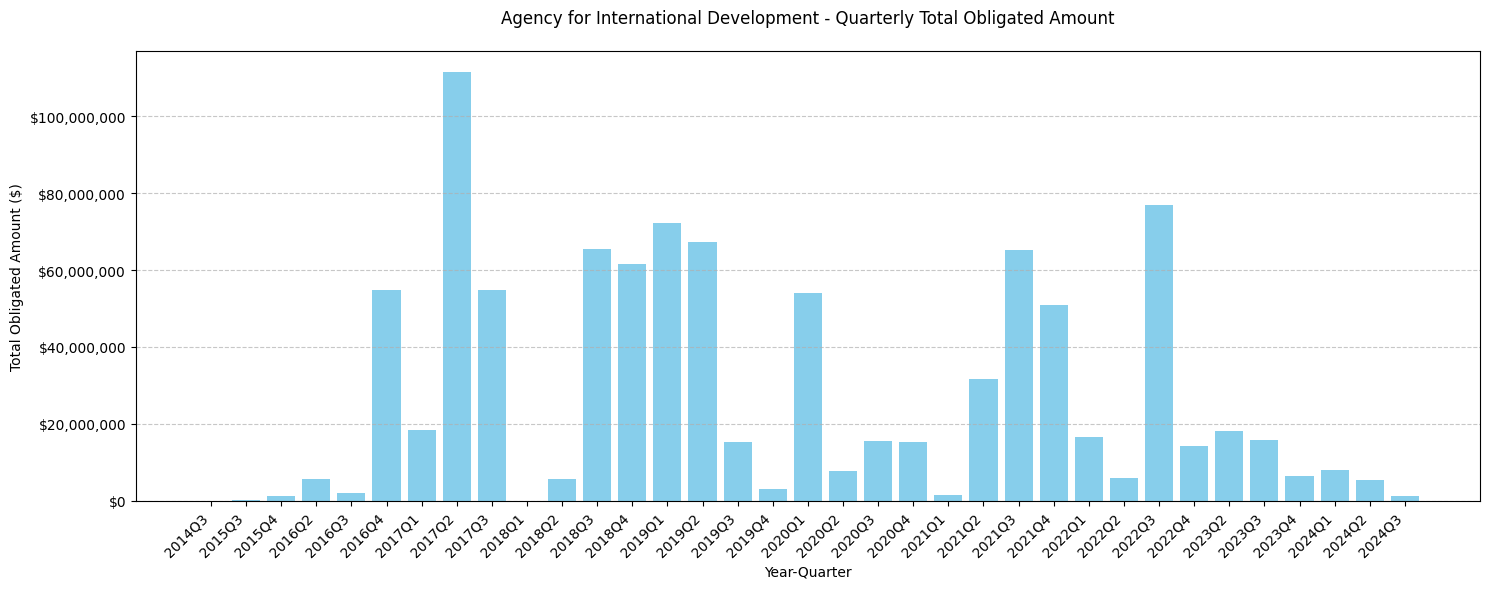

In [94]:
# Filter for Agency for International Development
aid_df = assistances_df[assistances_df['awarding_agency_name'] == 'Agency for International Development'].copy()

# Convert action_date to datetime if not already
aid_df['action_date'] = pd.to_datetime(aid_df['action_date'])

# Create year and quarter
aid_df['year_quarter'] = aid_df['action_date'].dt.to_period('Q')

# Group by year_quarter and sum the total_obligated_amount
quarterly_amounts = aid_df.groupby('year_quarter')['total_obligated_amount'].sum().reset_index()
quarterly_amounts['year_quarter'] = quarterly_amounts['year_quarter'].astype(str)

# Create the plot
plt.figure(figsize=(15, 6))
plt.bar(quarterly_amounts['year_quarter'], quarterly_amounts['total_obligated_amount'], color='skyblue')

# Customize the plot
plt.title('Agency for International Development - Quarterly Total Obligated Amount', pad=20)
plt.xlabel('Year-Quarter')
plt.ylabel('Total Obligated Amount ($)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis to show millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [95]:
# Set display options to show all rows and full column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filter for Department of State records and group by recipient_name
dept_state_summary = assistances_df[assistances_df['awarding_agency_name'] == 'Inter-American Foundation'].groupby('recipient_name').agg({
    'recipient_name': 'count',
    'total_obligated_amount': 'sum',
    'subaward_amount': 'sum'
}).rename(columns={'recipient_name': 'count'})

# Format the total_obligated_amount as currency
dept_state_summary['total_obligated_amount'] = dept_state_summary['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")
dept_state_summary['subaward_amount'] = dept_state_summary['subaward_amount'].apply(lambda x: f"${x:,.2f}")

# Sort by total_obligated_amount (converting back to float for sorting)
dept_state_summary = dept_state_summary.sort_values(
    by='total_obligated_amount',
    key=lambda x: x.str.replace('$', '').str.replace(',', '').astype(float),
    ascending=False
)

# Display the results
display(dept_state_summary)

,count,total_obligated_amount,subaward_amount
recipient_name,,,
CENTRO DE ESTUDOS E PROMOCAO DA AGRICULTURA DE GRUPO,4,"$3,461,744.00",$0.00
WORLDWIDE INITIATIVES FOR GRANTMAKING SUPPORT INC.,4,"$2,458,260.00",$0.00
CARITAS BRASILEIRA,6,"$2,028,099.00",$0.00
FUNDO SOCIOAMBIENTAL CASA,4,"$1,936,216.00",$0.00
DIACONIA,2,"$1,014,300.00",$0.00
ASSOCIACAO MOVIMENTO MECENAS DA VIDA,4,"$957,542.00",$0.00
ASSOCIACAO ESCOLA FAMILIA AGRICOLA JAGUARIBANA,2,"$880,086.00",$0.00
TABOA FORTALECIMENTO COMUNITARIO,2,"$864,354.00",$0.00
FUNDO POSITIVO,2,"$848,000.00",$0.00


In [97]:
# Set display options to show all rows and full column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filter for Department of State records and group by recipient_name
dept_state_summary = assistances_df[assistances_df['awarding_agency_name'] == 'U.S. International Development Finance Corporation'].groupby('recipient_name').agg({
    'recipient_name': 'count',
    'total_obligated_amount': 'sum',
    'subaward_amount': 'sum'
}).rename(columns={'recipient_name': 'count'})

# Format the total_obligated_amount as currency
dept_state_summary['total_obligated_amount'] = dept_state_summary['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")
dept_state_summary['subaward_amount'] = dept_state_summary['subaward_amount'].apply(lambda x: f"${x:,.2f}")

# Sort by total_obligated_amount (converting back to float for sorting)
dept_state_summary = dept_state_summary.sort_values(
    by='total_obligated_amount',
    key=lambda x: x.str.replace('$', '').str.replace(',', '').astype(float),
    ascending=False
)

# Display the results
display(dept_state_summary)

,count,total_obligated_amount,subaward_amount
recipient_name,,,
GAVI ALLIANCE,1,"$250,000,000.00",$0.00
MISCELLANEOUS FOREIGN AWARDEES,4,"$115,000,000.00",$0.00
TECHMET PHALABORWA RARE EARTHS,1,"$30,000,000.00",$0.00
XIC LATINAMERICA INFRASTRUCTURE ALPHA PLUS FUND I,1,"$25,000,000.00",$0.00
"DALUS CAPITAL FUND III, LP",1,"$15,000,000.00",$0.00
BANCO BTG PACTUAL S.A.,1,$0.00,$0.00
BANCO DAYCOVAL S.A.,1,$0.00,$0.00
"BANCO SOFISA, S.A.",1,$0.00,$0.00
GIP MEDICINA DIAGNÓSTICA S.A. (“FEMME”),1,$0.00,$0.00


In [104]:
#10	Export-Import Bank of the United States	15
#15	Overseas Private Investment Corporation	6
#12	National Endowment for the Arts	5
#1	Corporation for National and Community Service	2
#13	National Endowment for the Humanities	1

# Set display options to show all rows and full column width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Filter for Department of State records and group by recipient_name
dept_state_summary = assistances_df[assistances_df['awarding_agency_name'] == 'National Endowment for the Humanities'].groupby('recipient_name').agg({
    'recipient_name': 'count',
    'total_obligated_amount': 'sum',
    'subaward_amount': 'sum'
}).rename(columns={'recipient_name': 'count'})

# Format the total_obligated_amount as currency
dept_state_summary['total_obligated_amount'] = dept_state_summary['total_obligated_amount'].apply(lambda x: f"${x:,.2f}")
dept_state_summary['subaward_amount'] = dept_state_summary['subaward_amount'].apply(lambda x: f"${x:,.2f}")

# Sort by total_obligated_amount (converting back to float for sorting)
dept_state_summary = dept_state_summary.sort_values(
    by='total_obligated_amount',
    key=lambda x: x.str.replace('$', '').str.replace(',', '').astype(float),
    ascending=False
)

# Display the results
display(dept_state_summary)

,count,total_obligated_amount,subaward_amount
recipient_name,,,
MULTIPLE RECIPIENTS,1,"$60,000.00",$0.00
